In [1]:
from optparse import OptionParser
from math import ceil, log
from timeit import Timer
import time 
from numpy import min as min
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Standard Matrix Product

def gera_matrix(m,n):
    A = numpy.array(numpy.random.rand(m, n), dtype = numpy.double)
    #print("A:" + str(A))
    B = numpy.array(numpy.random.rand(m, n), dtype = numpy.double)
    #print("B:" + str(B))
    return A, B

def printMatrix(matrix):
    for line in matrix:
        print ("\t".join(map(str,line)))

def standardMatrixProduct(A, B):
    n = len(A)
    C = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

def executa_standardMatrixProduct(m,n):
    A, B = gera_matrix(m,n)
    start = time.time() 
    C = standardMatrixProduct(A, B)
    end = time.time() 
    tm = (end-start)
    #print_matrix(C)
    print("standardMatrixProduct:" + str(tm)) 
    return tm

In [3]:
#Matrix Multiplication with Numpy

def test_mm(m, n): 
  
    A = numpy.array(numpy.random.rand(m, n), dtype = numpy.double)
    #print("A:" + str(A))
    B = numpy.array(numpy.random.rand(m, n), dtype = numpy.double)
    #print("B: "+ str(B))
    
    #t = Timer('C = numpy.dot(A, B)')
    
    start = time.time()
    #print("Start: " + str(start))
    
    C = numpy.dot(A, B)
    
    end = time.time() 
    #print("End: " + str(end))
    
    #print("C:" + str(C))
    
    tm = (end-start)
    print("MM:" + str(tm))
    return tm

In [4]:
# Strassen

def gera_matrix(m,n):
    A = numpy.array(numpy.random.rand(m, n), dtype = numpy.double)
    #print("A:" + str(A))
    B = numpy.array(numpy.random.rand(m, n), dtype = numpy.double)
    #print("B:" + str(B))
    return A, B    


def print_matrix(matrix):
    for line in matrix:
        print("\t".join(map(str, line)))


def ikj_matrix_product(A, B):
    n = len(A)
    C = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for k in range(n):
            for j in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C


def add(A, B):
    n = len(A)
    C = [[0 for j in range(0, n)] for i in range(0, n)]
    for i in range(0, n):
        for j in range(0, n):
            C[i][j] = A[i][j] + B[i][j]
    return C


def subtract(A, B):
    n = len(A)
    C = [[0 for j in range(0, n)] for i in range(0, n)]
    for i in range(0, n):
        for j in range(0, n):
            C[i][j] = A[i][j] - B[i][j]
    return C


def strassenR(A, B):
    LEAF_SIZE = 2
    
    n = len(A)

    if n <= LEAF_SIZE:
        return ikj_matrix_product(A, B)
    else:
        # initializing the new sub-matrices
        new_size = n//2
        a11 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        a12 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        a21 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        a22 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]

        b11 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        b12 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        b21 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        b22 = [[0 for j in range(0, new_size)] for i in range(0, new_size)]

        aResult = [[0 for j in range(0, new_size)] for i in range(0, new_size)]
        bResult = [[0 for j in range(0, new_size)] for i in range(0, new_size)]

        # dividing the matrices in 4 sub-matrices:
        for i in range(0, new_size):
            for j in range(0, new_size):
                a11[i][j] = A[i][j]            # top left
                a12[i][j] = A[i][j + new_size]    # top right
                a21[i][j] = A[i + new_size][j]    # bottom left
                a22[i][j] = A[i + new_size][j + new_size] # bottom right

                b11[i][j] = B[i][j]            # top left
                b12[i][j] = B[i][j + new_size]    # top right
                b21[i][j] = B[i + new_size][j]    # bottom left
                b22[i][j] = B[i + new_size][j + new_size] # bottom right

        # Calculating p1 to p7:
        aResult = add(a11, a22)
        bResult = add(b11, b22)
        p1 = strassenR(aResult, bResult) # p1 = (a11+a22) * (b11+b22)

        aResult = add(a21, a22)      # a21 + a22
        p2 = strassenR(aResult, b11)  # p2 = (a21+a22) * (b11)

        bResult = subtract(b12, b22) # b12 - b22
        p3 = strassenR(a11, bResult)  # p3 = (a11) * (b12 - b22)

        bResult = subtract(b21, b11) # b21 - b11
        p4 =strassenR(a22, bResult)   # p4 = (a22) * (b21 - b11)

        aResult = add(a11, a12)      # a11 + a12
        p5 = strassenR(aResult, b22)  # p5 = (a11+a12) * (b22)

        aResult = subtract(a21, a11) # a21 - a11
        bResult = add(b11, b12)      # b11 + b12
        p6 = strassenR(aResult, bResult) # p6 = (a21-a11) * (b11+b12)

        aResult = subtract(a12, a22) # a12 - a22
        bResult = add(b21, b22)      # b21 + b22
        p7 = strassenR(aResult, bResult) # p7 = (a12-a22) * (b21+b22)

        # calculating c21, c21, c11 e c22:
        c12 = add(p3, p5) # c12 = p3 + p5
        c21 = add(p2, p4)  # c21 = p2 + p4

        aResult = add(p1, p4) # p1 + p4
        bResult = add(aResult, p7) # p1 + p4 + p7
        c11 = subtract(bResult, p5) # c11 = p1 + p4 - p5 + p7

        aResult = add(p1, p3) # p1 + p3
        bResult = add(aResult, p6) # p1 + p3 + p6
        c22 = subtract(bResult, p2) # c22 = p1 + p3 - p2 + p6

        # Grouping the results obtained in a single matrix:
        C = [[0 for j in range(0, n)] for i in range(0, n)]
        for i in range(0, new_size):
            for j in range(0, new_size):
                C[i][j] = c11[i][j]
                C[i][j + new_size] = c12[i][j]
                C[i + new_size][j] = c21[i][j]
                C[i + new_size][j + new_size] = c22[i][j]
        return C


def strassen(A, B):
    #assert type(A) == list and type(B) == list
    #assert len(A) == len(A[0]) == len(B) == len(B[0])

    # Make the matrices bigger so that you can apply the strassen
    # algorithm recursively without having to deal with odd
    # matrix sizes
    nextPowerOfTwo = lambda n: 2**int(ceil(log(n,2)))
    n = len(A)
    m = nextPowerOfTwo(n)
    APrep = [[0 for i in range(m)] for j in range(m)]
    BPrep = [[0 for i in range(m)] for j in range(m)]
    for i in range(n):
        for j in range(n):
            APrep[i][j] = A[i][j]
            BPrep[i][j] = B[i][j]
    CPrep = strassenR(APrep, BPrep)
    C = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            C[i][j] = CPrep[i][j]
    return C


def executa_strassen(m,n):
    A, B = gera_matrix(m,n)
    start = time.time() 
    C = strassen(A, B)
    end = time.time() 
    tm = (end-start)
    
    print("strassen:" + str(tm))
    return tm
    
    #print_matrix(C)
    

MM:0.40627193450927734
standardMatrixProduct:1561.103003025055
strassen:2206.6766216754913


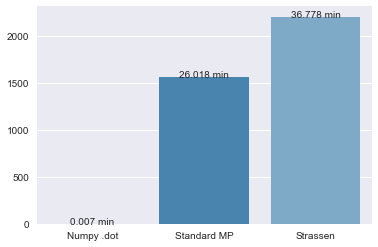

In [5]:
resultados = []
nomes = []

if __name__ == '__main__':
    mm = test_mm(m=1000, n=1000)
    resultados.append(mm)
    nomes.append("Numpy .dot")
    stm = executa_standardMatrixProduct(m=1000,n=1000)
    resultados.append(stm)
    nomes.append("Standard MP")
    st = executa_strassen(m=1000, n=1000)
    resultados.append(st)
    nomes.append("Strassen")

bp = sns.barplot(x=nomes, y=resultados, palette="Blues_d")
for p in bp.patches:
    height = p.get_height()
    bp.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{:1.3f} min'.format(height/60),
            ha="center") 

In [6]:
## Matrix Multiplication
#1000x1000 = 0.40627193450927734


## Standard Matrix Product
#550x550 = 223.2659192085266 = 3min
#1000x1000 = 1561.103003025055 = 26min

## strassen
# 50x50 = 0.8
# 250x250 = 49.386
# 1000x1000 = 2347.2838394641876 - 49min
# 550x550 =2246.8142869472504 - 37min
# 1000x1000 =2206.6766216754913 = 36 min